In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('./web-app/car-dataset.csv')
print(data.shape)
data.head()

(4340, 8)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [25]:
print('Unique elements in Seller_Type are',data['seller_type'].unique())
print('Unique elements in Fuel_Type are',data['fuel'].unique())
print('Unique elements in Transmission are',data['transmission'].unique())
print('Unique elements in Owner are',data['owner'].unique())
print('Unique elements in Year are',data['year'].unique())
print('Unique elements in Year are',data['km_driven'].unique())
print('Unique elements in Year are',data['name'].unique())

Unique elements in Seller_Type are ['Individual' 'Dealer' 'Trustmark Dealer']
Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
Unique elements in Year are [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
Unique elements in Year are [ 70000  50000 100000  46000 141000 125000  25000  60000  78000  35000
  24000   5000  33000  28000  59000   4500 175900  14500  15000  33800
 130400  80000  10000 119000  75800  40000  74000  64000 120000  79000
  18500  10200  29000  90000  73300  92000  66764 350000 230000  31000
  39000 166000 110000  54000  63000  76000  11958  20000   9000   6500
  58000  62200  34000  53000  49000  63500   9800  13000  21000  29173
  48000  30000  87000  16000  79350  81000   3600  1

In [27]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [30]:
data['fuel'] = data['fuel'].astype('category').cat.codes 
data['seller_type'] = data['seller_type'].astype('category').cat.codes
data['transmission'] = data['transmission'].astype('category').cat.codes
data['owner'] = data['owner'].astype('category').cat.codes

name_mapping = {name: code for code, name in enumerate(data['name'].astype('category').cat.categories)}
data['name']=data['name'].astype('category').cat.codes


In [36]:
data.fillna(data.mean(), inplace=True)

In [37]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


In [38]:
data.corr()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,1.000000,-0.051902,-0.077598,0.126203,-0.083927,0.140802,0.087785,0.032819
year,-0.051902,1.000000,0.413922,-0.419688,-0.120002,-0.098352,-0.143800,-0.414705
selling_price,-0.077598,0.413922,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840
km_driven,0.126203,-0.419688,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115
fuel,-0.083927,-0.120002,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910
seller_type,0.140802,-0.098352,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681
transmission,0.087785,-0.143800,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893
owner,0.032819,-0.414705,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000


<Axes: >

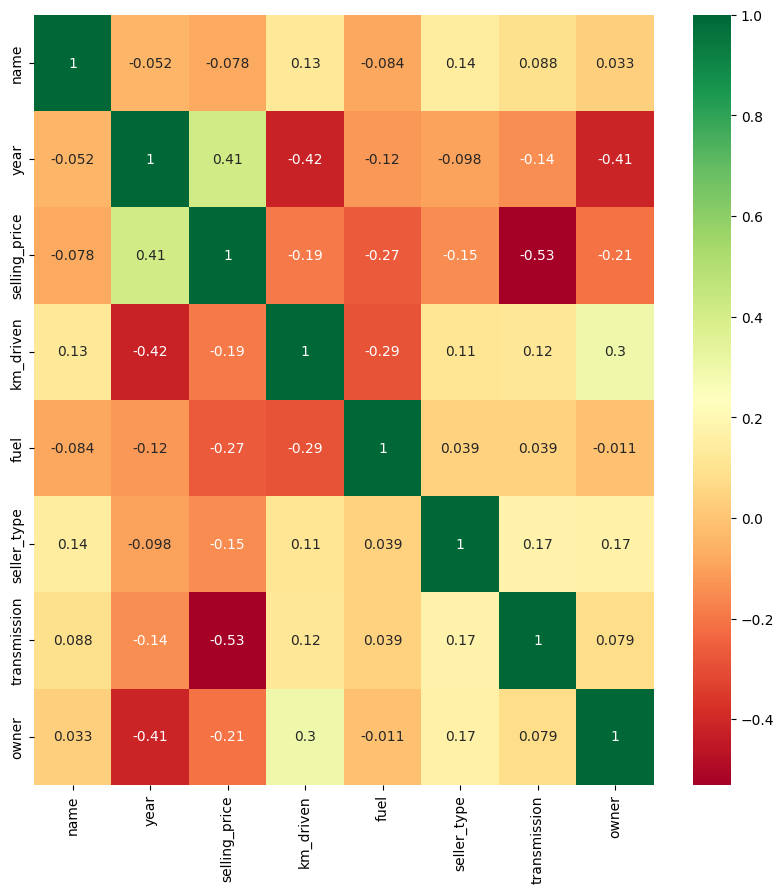

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [45]:
X = data.drop(columns=['selling_price']).values
y = data['selling_price'].values

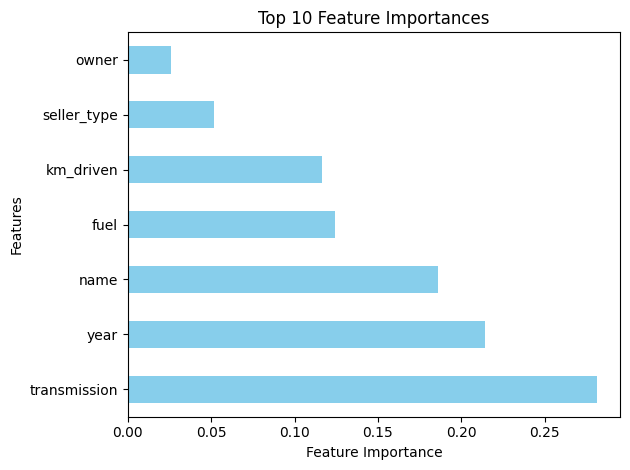

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
feature_names = data.drop(columns=['selling_price']).columns  # Get column names

model = ExtraTreesRegressor()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [52]:
def normalize(X):
    return (X-X.mean())/X.std()

X_train = normalize(X_train)
X_test = normalize(X_test)

print(X_train)
print(X_test)

[[-0.32324674 -0.26963981  2.74031912 ... -0.33853857 -0.33853857
  -0.33857278]
 [-0.3127443  -0.26974244  1.4950784  ... -0.33857278 -0.33853857
  -0.33857278]
 [-0.32437567 -0.26950297  0.85877407 ... -0.33853857 -0.33853857
  -0.33850436]
 ...
 [-0.30682598 -0.26970823  1.71402182 ... -0.33853857 -0.33853857
  -0.33850436]
 [-0.31144432 -0.2699477   4.17713534 ... -0.33853857 -0.33853857
  -0.33857278]
 [-0.30836543 -0.26967402  3.08241822 ... -0.33853857 -0.33853857
  -0.33850436]]
[[-0.33019387 -0.2736369   0.3679725  ... -0.34564445 -0.34568014
  -0.34568014]
 [-0.31178164 -0.27377963  1.2600383  ... -0.34564445 -0.34564445
  -0.34568014]
 [-0.31691993 -0.27370827  0.18955934 ... -0.34564445 -0.34564445
  -0.34568014]
 ...
 [-0.32662561 -0.27367258  1.08162514 ... -0.34564445 -0.34564445
  -0.34568014]
 [-0.30011342 -0.27395805  0.01114618 ... -0.34564445 -0.34564445
  -0.34568014]
 [-0.33065775 -0.27395805  3.42047893 ... -0.34564445 -0.34564445
  -0.34568014]]


In [53]:

def np_add_ones(X):
    ones = np.ones((X.shape[0], 1))
    return np.concatenate((ones, X), axis=1)

X_train = np_add_ones(X_train)
X_test = np_add_ones(X_test)

theta = np.zeros(X_train.shape[1])

def np_hypothesis(X, theta):
    return X.dot(theta)

def np_cost(X, Y, theta):
    m = len(Y)
    return 1 / (2 * m) * np.sum((X.dot(theta) - Y) ** 2)

def np_gradient_descent(X, Y, theta, alpha, iterations, printing=True, convergence=True):
    m = len(Y)
    for i in range(iterations):
        prev_cost = np_cost(X, Y, theta)
        theta = theta - alpha / m * X.T.dot(X.dot(theta) - Y)
        cost = np_cost(X, Y, theta)
        
        percentage_change = (prev_cost - cost) / prev_cost
        if convergence and percentage_change < 0.00002:
            if percentage_change<0.00002:
                if printing:
                    print("Converged at iteration ",i)
                    print("Final Iteration: ",i," Cost: ",cost," Prev Cost: ",prev_cost," Percentage Change: ",percentage_change)
            break
        if i%100==0:
            if printing:
                print("Iteration: ",i," Cost: ",cost)
            
    return theta

theta = np_gradient_descent(X_train, Y_train, theta, 0.001, 10000)
print(theta)

Iteration:  0  Cost:  296438644041.2184
Iteration:  100  Cost:  238816689457.49295
Iteration:  200  Cost:  221014490682.2157
Iteration:  300  Cost:  212706873555.39648
Iteration:  400  Cost:  207005357648.4122
Iteration:  500  Cost:  202307346706.91043
Iteration:  600  Cost:  198206541925.60477
Iteration:  700  Cost:  194571062209.07797
Iteration:  800  Cost:  191335233055.41144
Iteration:  900  Cost:  188452204909.97882
Iteration:  1000  Cost:  185882854146.6098
Iteration:  1100  Cost:  183592903820.32907
Iteration:  1200  Cost:  181551937322.58408
Iteration:  1300  Cost:  179732875177.96057
Iteration:  1400  Cost:  178111588901.5491
Iteration:  1500  Cost:  176666574901.08395
Iteration:  1600  Cost:  175378667902.80783
Iteration:  1700  Cost:  174230786451.65518
Iteration:  1800  Cost:  173207706288.37103
Iteration:  1900  Cost:  172295858412.68045
Iteration:  2000  Cost:  171483149112.4852
Iteration:  2100  Cost:  170758799562.7165
Iteration:  2200  Cost:  170113202864.30737
Iterati

In [55]:
alpha=[0.001,0.01]
iterations=[10,100,500,1000,5000]

best_alpha,best_iterations,best_cost,best_theta=0,0,float('inf'),np.zeros(X_train.shape[1])
for a in alpha:
    for i in iterations:
        curr_theta=np.zeros(X_train.shape[1])
        curr_theta=np_gradient_descent(X_train,Y_train,curr_theta,a,i,False,False)
        print("Alpha: ",a," Iterations: ",i," Cost: ",np_cost(X_train,Y_train,curr_theta))
        if np_cost(X_train,Y_train,curr_theta)<best_cost:
            best_cost=np_cost(X_test,Y_test,curr_theta)
            best_theta=curr_theta
            best_alpha=a
            best_iterations=i
print("Old Alpha: ",0.001," Old Iterations: ",10000," Old Cost: ",np_cost(X_train,Y_train,theta))
print("Best Alpha: ",best_alpha," Best Iterations: ",best_iterations," Best Cost: ",best_cost)
print("cost of current theta: ",np_cost(X_train,Y_train,theta))
theta=best_theta
print("cost of best theta: ",np_cost(X_train,Y_train,theta))

print(theta)

Alpha:  0.001  Iterations:  10  Cost:  287588766976.8731
Alpha:  0.001  Iterations:  100  Cost:  239105023815.5391
Alpha:  0.001  Iterations:  500  Cost:  202351041987.5319
Alpha:  0.001  Iterations:  1000  Cost:  185907110912.17245
Alpha:  0.001  Iterations:  5000  Cost:  165031640056.77292
Alpha:  0.01  Iterations:  10  Cost:  238327083221.6759
Alpha:  0.01  Iterations:  100  Cost:  185844111136.96222
Alpha:  0.01  Iterations:  500  Cost:  165028505876.079
Alpha:  0.01  Iterations:  1000  Cost:  164820313763.18668
Alpha:  0.01  Iterations:  5000  Cost:  164812621181.83582
Old Alpha:  0.001  Old Iterations:  10000  Old Cost:  165031640056.77292
Best Alpha:  0.001  Best Iterations:  5000  Best Cost:  146709765368.26584
cost of current theta:  165031640056.77292
cost of best theta:  165031640056.77292
[ 367808.1793719  -118134.94349326  -99031.84795522  -55521.79447571
 -124540.85079857 -124526.63396692 -124534.3980859  -124543.96757047]


In [56]:
X_test.dot(theta)

def MSE(Y,Y_pred):
    return np.mean((Y-Y_pred)**2)

Y_pred=X_test.dot(theta)
print("Cost : ",MSE(Y_test,Y_pred))

print(pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_pred,'diff':Y_test-Y_pred}))

Cost :  293419530736.5317
      Y_test         Y_pred          diff
0     650000  585660.794668  6.433921e+04
1     217000  533966.263220 -3.169663e+05
2     325000  594001.121124 -2.690011e+05
3     400000  503415.527770 -1.034155e+05
4    1580000  456747.140878  1.123253e+06
..       ...            ...           ...
863    65000  502854.552222 -4.378546e+05
864   550000  585890.233553 -3.589023e+04
865   800000  545615.072982  2.543849e+05
866    70000  601946.238675 -5.319462e+05
867   150000  416262.319500 -2.662623e+05

[868 rows x 3 columns]


In [57]:
new_car = np.array([[1041,2017,46000,2,0,1,0]])
new_car = normalize(new_car)
new_car = np.insert(new_car,0,1,axis=1)
predicted_price = new_car.dot(theta)

print(predicted_price[0])

526300.7267798384


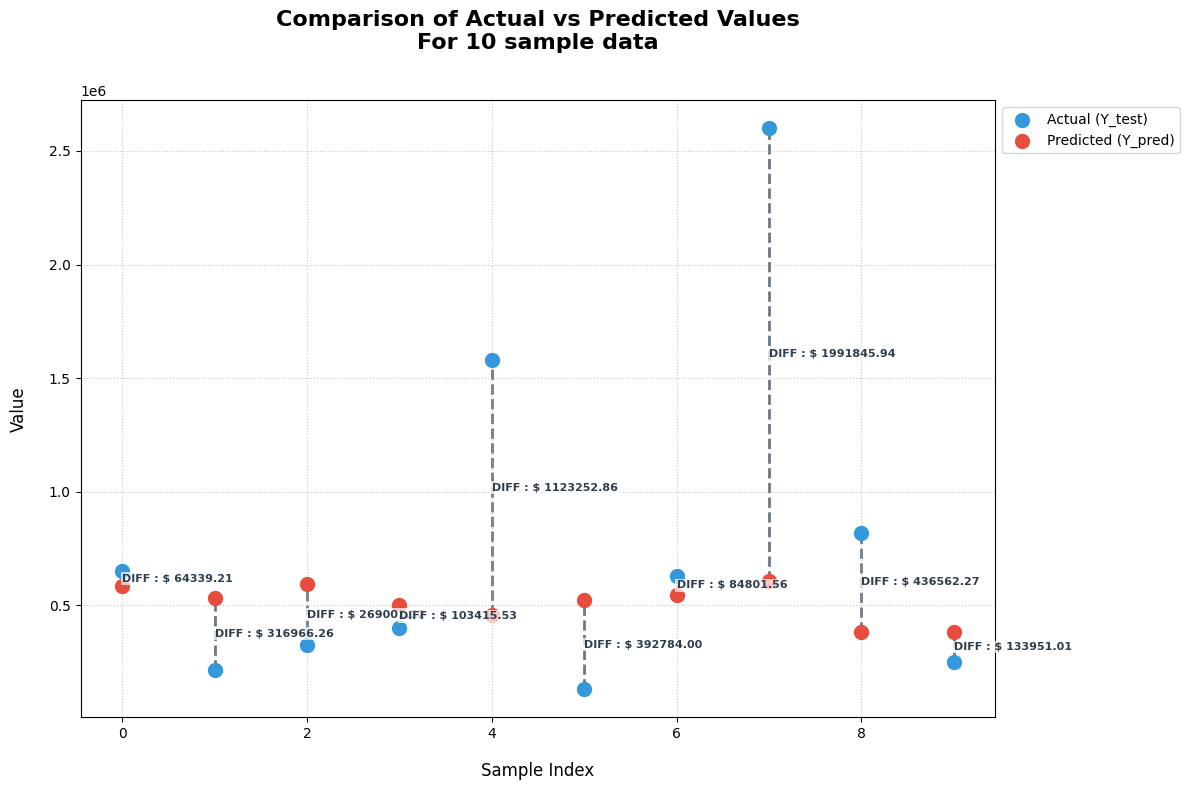

In [59]:
import matplotlib.pyplot as plt

def plot_regression_comparison(Y_test, Y_pred, count=10):
    plt.figure(figsize=(12, 8))
    
    x = np.arange(count)
    
    Y_test = pd.Series(Y_test)
    Y_pred = pd.Series(Y_pred)
    
    plt.scatter(x, Y_test.iloc[:count], color='#3498db', s=100, label='Actual (Y_test)', zorder=2)
    
    plt.scatter(x, Y_pred.iloc[:count], color='#e74c3c', s=100, label='Predicted (Y_pred)', zorder=2)
    
    for i in range(count):
        y_test = Y_test.iloc[i]
        y_pred = Y_pred.iloc[i]
        y_min = min(y_test, y_pred)
        y_max = max(y_test, y_pred)
        plt.vlines(x=i, ymin=y_min, ymax=y_max, 
                   color='#2c3e50', linestyle='--', alpha=0.7, linewidth=2, zorder=1)
        
        delta = abs(y_test - y_pred)
        plt.text(i, (y_min + y_max) / 2, f'DIFF : $ {delta:.2f}', 
                 horizontalalignment='left', verticalalignment='center',
                 fontsize=8, color='#2c3e50', fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

    plt.title('Comparison of Actual vs Predicted Values\nFor 10 sample data\n', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Sample Index', fontsize=12, labelpad=15)
    plt.ylabel('Value', fontsize=12, labelpad=15)
    
    plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_regression_comparison(Y_test, Y_pred)